# Keras and Theano Tutorial

In this tutorial, I'll be using deep learning to get some practice with Artificial Neural Networks and Recurrent Neural Networks. Two of the most common deep learning libraries are <strong>Theano</strong> and <strong>TenserFlow</strong>. Unfortunately, despite their strengths, they have a reputation for being difficult to use. 

Luckily for me, the <strong>Keras</strong> library is a type of wrapper that allows us to use them without having to worry about the underlying mechanics in order to start prototyping fast.

For this sample, I'll be following this [template](https://elitedatascience.com/keras-tutorial-deep-learning-in-python#step-1) for image classification.

## Formatting and Preprocessing Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
%matplotlib nbagg

In [2]:
#Make work reproducible
np.random.seed(42)

In [3]:
#First we'll impor tthe Sequential model from Keras (linear stack of NN's)
#Then import the 'core' layers (used in almost any network)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten

Using Theano backend.


In [4]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

In [5]:
from keras.datasets import mnist

#Load pre-shuffled MNIST data and split into train/test
(xTrain, yTrain), (xTest, yTest) = mnist.load_data()

In [6]:
print type(xTrain)
print xTrain.shape

<type 'numpy.ndarray'>
(60000, 28, 28)


The above tells us that we have 60k samples, each 28x28 images. Let's look at the first three as examples.

<IPython.core.display.Javascript object>


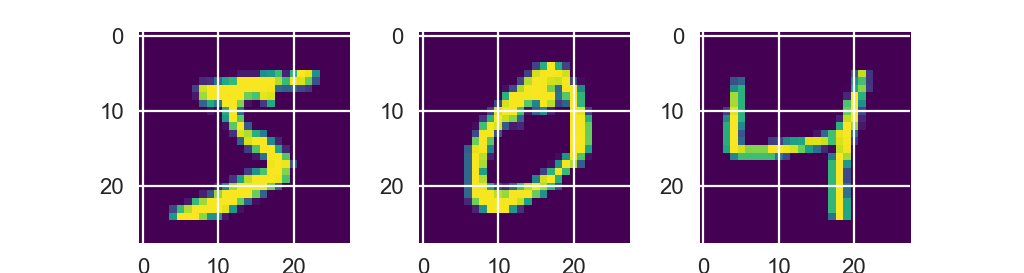

In [7]:
plt.subplots(1,3)
plt.subplot(1,3,1)
plt.imshow(xTrain[0], cmap= 'viridis')
plt.subplot(1,3,2)
plt.imshow(xTrain[1], cmap= 'viridis')
plt.subplot(1,3,3)
plt.imshow(xTrain[2], cmap= 'viridis')

When using images for ML applications, we need to flatten the arrays into 1D vectors (that way we use each pixel as a feature column and each row is an instance or data point). We can do that by using np.reshape. 

In [8]:
#Following turns all 28x28 arrays into 1x784 arrays
xTrain2 = xTrain.reshape(xTrain.shape[0], 1, 28, 28)
xTest2 = xTest.reshape(xTest.shape[0], 1, 28, 28)

In [9]:
#Sanity check
print xTrain.shape
print xTrain2.shape

(60000, 28, 28)
(60000, 1, 28, 28)


Now let's convert our input data into float32 type and standardize the data to range(0,1).

In [10]:
#Change types
xTrain2= xTrain2.astype('float32')
xTest2 = xTest2.astype('float32')

#Currently data is of range(0,255) so change to range(0,1)
xTrain2 /= 255
xTest2 /= 255

Let's look at the y data for our trainin data and look at the specific values of the first ten data points.

In [11]:
print yTrain.shape
print yTrain[:10]

(60000,)
[5 0 4 1 9 2 1 3 1 4]


We'll need to change the format of our data from an array with individual values for each sample to binary responses about each class (similar to one-hot encoding).

In [12]:
#Convert 1D array to 10D class array
yTrain2 = np_utils.to_categorical(yTrain, 10)
yTest2 = np_utils.to_categorical(yTest, 10)

print "Let's look at the dimensions of our old yTrain and our new yTrain2 labels:"
print yTrain.shape
print yTrain2.shape

Let's look at the dimensions of our old yTrain and our new yTrain2 labels:
(60000,)
(60000, 10)


In [13]:
print "Now let's look at the same data represented as integers and in categorical/one-hot encoded format:"
print yTrain[:5]
print yTrain2[:5]

Now let's look at the same data represented as integers and in categorical/one-hot encoded format:
[5 0 4 1 9]
[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]


Notice that they correspond to each other as expected (5 ~ 1 for position 6, 0 is 0 for position 0 etc).

## Defining Model Architecture

Below is an example diagram of the most simple neural network, called a <strong>perceptron</strong>. We can think the act of combining our inputs (sum input fxn) as our input layer and our activation function node as our output layer.

<img src="https://dl.dropboxusercontent.com/u/59776078/perceptron_drawing.png">

It sounds like the architecture of the models can get very complicated, so for this example we will begin with a <strong>Sequential model</strong>. 

In [14]:
#Initialize sequential model
model = Sequential()

In [15]:
#Declare our input layer
model.add(Convolution2D(32,3,3, activation = 'relu', input_shape= (1,28,28)))

The add() method allows us to add layers to our model. According to the Keras [manual](https://keras.io/getting-started/sequential-model-guide/), the first layer defines the shape of your model and all subsequent models have shape inferred. Here, we're presumably using a 2D convolution function since our training data was composed of 2D images.

If you recall, the activation parameter refers to the activation function that particular layer will use to generate an output.  In the Convolution2D layer above, (1,28,28) is the input shape parameter while 32,3,3 correspond to the number of convolution filters to use, and the dimensions of the convolution kernel (rows, columns), respectively. 

In [16]:
print model.output_shape

(None, 32, 26, 26)


Now let's add additional layers to our model.

In [17]:
#Add additional layers, notice that we don't define input shape anymore
model.add(Convolution2D(32,3,3, activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

Above, we've added a second convolution layer, along with a maxPooling layer that reduces the number of parameters in our models by filtering the previous layer. The dropout layer regularizes our model to prevent overfitting.

In [19]:
#Add fully connected dense layers
model.add(Flatten())
model.add(Dense(128, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

A couple of things to note:
* For dense layers, first parameter is output size of layer
* Keras automatically handles the connections between layers
* Final layer has size of 10 corresponding to 10 classes of digits
* The weights from the Convolution layers must be flattened before being passed to the fully connected dense layer

Now we'll need to define the loss function and the optimizer (this refers to the methods/techniques used to minimize our loss function for training deep learning models). 

## Compile Model
As mentioned above, now we'll need to define the loss function and optimizer of choice which you can find [here](http://www.deeplearningbook.org/contents/optimization.html) and [here](https://keras.io/optimizers/).

In [21]:
model.compile(loss= 'categorical_crossentropy', 
              optimizer= 'adam', metrics= ['accuracy'])

## Fit model on Training Data

Requires us to define the batch size and number of epochs to train, and pass our training data.

In [ ]:
model.fit(xTrain2, yTrain2, batch_size=32, 
          nb_epoch=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 139s - loss: 0.1982 - acc: 0.9395   
Epoch 2/10
60000/60000 [==============================] - 130s - loss: 0.0863 - acc: 0.9746   
Epoch 3/10
60000/60000 [==============================] - 125s - loss: 0.0686 - acc: 0.9791   
Epoch 4/10
39616/60000 [==================>...........] - ETA: 43s - loss: 0.0568 - acc: 0.9829

This takes a bit of time and it would be possible to use callbacks to set early-stopping rules, save model weights along the way or log the history of each training epoch. 

## Evaluate model on test data
Now let's evaluate the results!

In [ ]:
score = model.evaluate(xTest2, yTest2, verbose= 0)

## Style Cell

In [18]:
#Import display and url reading libraries
from IPython.core.display import display, HTML
import urllib2

#First adjust the width of the cells
display(HTML('''
<style>
.container { width:100% !important; }
</style>
'''))

#This next style based on this template: https://github.com/dunovank/jupyter-themes
#Now fetch the styling elements from the css file we're using as a template
HTML(urllib2.urlopen('https://dl.dropboxusercontent.com/u/59776078/data_science/data_science/grade3_style.css').read())